# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [21]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я,\s]','', text)
text = re.sub('[\t,\n,\f,\r,\v]','', text)

In [27]:
rus = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(rus)}

In [28]:
probabilities = np.zeros((len(rus), len(rus)))

In [29]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [30]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [31]:
probabilities.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
df = pd.DataFrame(probabilities, index=(c for c in rus), columns=(c for c in rus))

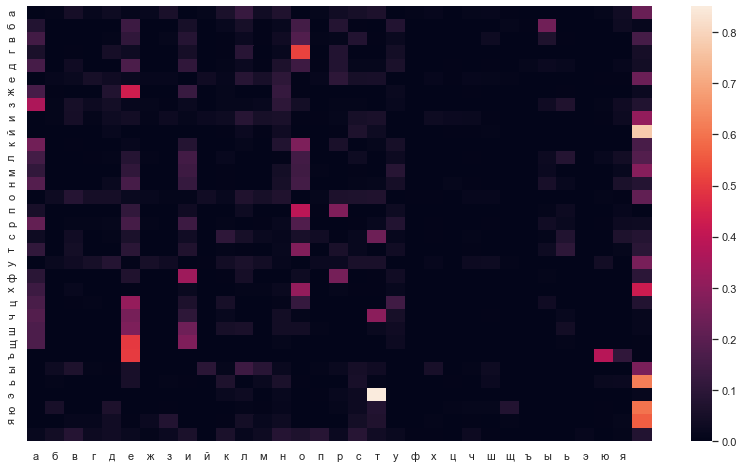

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [34]:
start = POS['п']
end = POS['р']
prior = 1. / len(rus)
for c in rus:
    for d in rus:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
            print(''.join(['п', c, d, 'р']), proba)

паар 1.5061351793705292e-08
пабр 1.2833832817733416e-06
павр 9.648307494023012e-07
пагр 1.7146458456734145e-06
падр 3.893995142608321e-06
паер 2.001660712051923e-06
пазр 8.877122491444863e-07
паир 4.083708029479565e-08
пайр 1.041613297155865e-07
пакр 5.663637668310273e-06
памр 1.1227144827140014e-07
панр 9.401363397446331e-08
паор 6.014564081974679e-08
папр 4.691082483510411e-06
парр 8.06404404392779e-08
паср 5.173274580441412e-07
патр 6.3079071129699075e-06
паур 7.561367461116382e-08
пафр 2.9664657471148397e-06
пахр 2.3339491382319305e-07
пачр 3.213660425393409e-08
пашр 8.826534245342913e-09
пащр 3.5839348164657108e-09
паэр 6.388386991014487e-10
паюр 2.193560226701263e-07
паяр 1.3315233431953304e-07
па р 9.215128850568225e-06
пгар 4.44647688184054e-08
пгвр 1.0530581070148275e-09
пгдр 7.756587090126229e-08
пгер 6.517972817132631e-08
пгзр 1.7108905732639786e-11
пгир 1.1019696606047729e-08
пгкр 6.733195590444406e-09
пгмр 2.2495327691520343e-11
пгнр 2.660638804537306e-10
пгор 6.5493997919

In [36]:
s = ['б']
start = np.random.choice(list(rus))
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(rus), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бъоювбее 


# -------------

In [40]:
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

In [41]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")["Count"]

In [42]:
values = series.values.reshape(-1,1)

In [45]:
for n in range(5, 21):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

5 -447.66570883789564
6 -442.92067606971193


Fitting a model with 79 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 98 free scalar parameters with only 77 data points will result in a degenerate solution.


7 -433.2011958611597
8 -426.69289794645425


Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 77 data points will result in a degenerate solution.


9 -422.0675307104746
10 -415.2820492582636


Fitting a model with 167 free scalar parameters with only 77 data points will result in a degenerate solution.


11 -409.5817141056567


Fitting a model with 194 free scalar parameters with only 77 data points will result in a degenerate solution.


12 -400.1031422012879


Fitting a model with 223 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 77 data points will result in a degenerate solution.


13 -393.4602828953255
14 -388.16527729183207


Fitting a model with 287 free scalar parameters with only 77 data points will result in a degenerate solution.


15 -376.22978904291443


Fitting a model with 322 free scalar parameters with only 77 data points will result in a degenerate solution.


16 -376.7938606234223


Fitting a model with 359 free scalar parameters with only 77 data points will result in a degenerate solution.


17 -373.1219573183954


Fitting a model with 398 free scalar parameters with only 77 data points will result in a degenerate solution.


18 -357.4715761634013


Fitting a model with 439 free scalar parameters with only 77 data points will result in a degenerate solution.


19 -352.8397744886403
20 -354.09393503107464


Fitting a model with 254 free scalar parameters with only 77 data points will result in a degenerate solution.


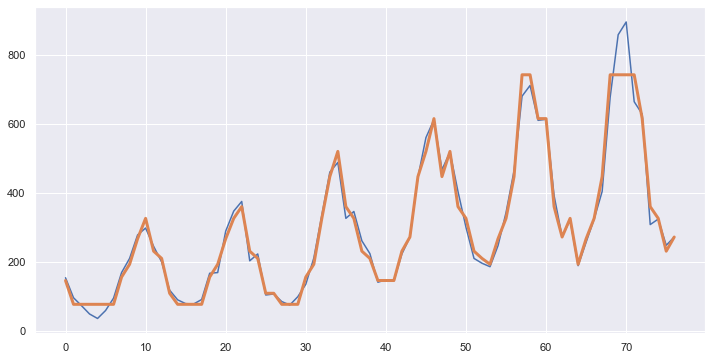

In [46]:
model = GaussianHMM(n_components=15,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [47]:
model.transmat_.shape

(15, 15)